In [86]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.gridspec as gridspec

sns.set()

## 1) Faça a leitura do arquivo csv de nome amazonia.csv.

In [38]:
df = pd.read_csv('amazonia.csv', encoding="ISO-8859-1")
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## 2) Imprima na tela o cabeçalho do csv informando quais atributos são utilizados.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


#### Convertendo coluna 'date' do tipo object para 'date', 'state' e 'month' para string

In [40]:
df['state'] = df['state'].astype(str)
df['month'] = df['month'].astype(str)
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## 3) Verifique a existência de nulos no dataset, caso exista informe qual a quantidade e a coluna específica. Caso seja necessário realize a remoção. Utilize do heatmap que usamos em sala de aula.

In [41]:
info_df = pd.DataFrame(df.dtypes).T.rename(index={0: 'Type'})
info_df = info_df.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'null values'}))
info_df = info_df.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0: 'null values (%)'}))
info_df

,year,state,month,number,date
Type,int64,object,object,float64,datetime64[ns]
null values,0,0,0,0,0
null values (%),0,0,0,0,0


## 4) Verifique a existência de duplicados no dataset, caso exista informe qual a quantidade e a coluna específica. Caso seja necessário realize a remoção.

In [42]:
df[df.duplicated()].count()

year      32
state     32
month     32
number    32
date      32
dtype: int64

In [43]:
df = df.drop_duplicates()
df[df.duplicated()].count()

year      0
state     0
month     0
number    0
date      0
dtype: int64

#### Para ajudar nas análises e ganhar tempo, irei criar uma nova variavel para receber o dataframe formatado

In [44]:
df_formated = df

## 5) Identifique a quantidade de anos distintos há no dataset

In [107]:
years_uniq = df_formated.year.unique()
years_uniq

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

## 6) Identifique quantos estados tiveram problemas com incêndios

In [108]:
states = df_formated.groupby(['state'])['number'].count()
states.sort_values(ascending=False)

state
Rio                 697
Mato Grosso         473
Paraiba             472
Tocantins           239
Maranhao            239
Alagoas             239
Amapa               239
Amazonas            239
Bahia               239
Ceara               239
Distrito Federal    239
Espirito Santo      239
Goias               239
Minas Gerais        239
Sergipe             239
Pará                239
Pernambuco          239
Piau                239
Rondonia            239
Roraima             239
Santa Catarina      239
Sao Paulo           239
Acre                239
Name: number, dtype: int64

## 7) Identifique se há concordância com o (mês,ano) exposto nas colunas e a respectiva coluna date. Caso não tenha, realize a remoção das discordâncias.

#### A coluna 'date' possui apenas o mes de janeiro para cada ano, remover irá apagar praticamente todo o o dataset

In [106]:
df_formated.head(100)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
95,2013,Acre,Maio,4.0,2013-01-01
96,2014,Acre,Maio,1.0,2014-01-01
97,2015,Acre,Maio,2.0,2015-01-01
98,2016,Acre,Maio,21.0,2016-01-01


## 8) Crie um histograma do somatório de incêndios ano a ano

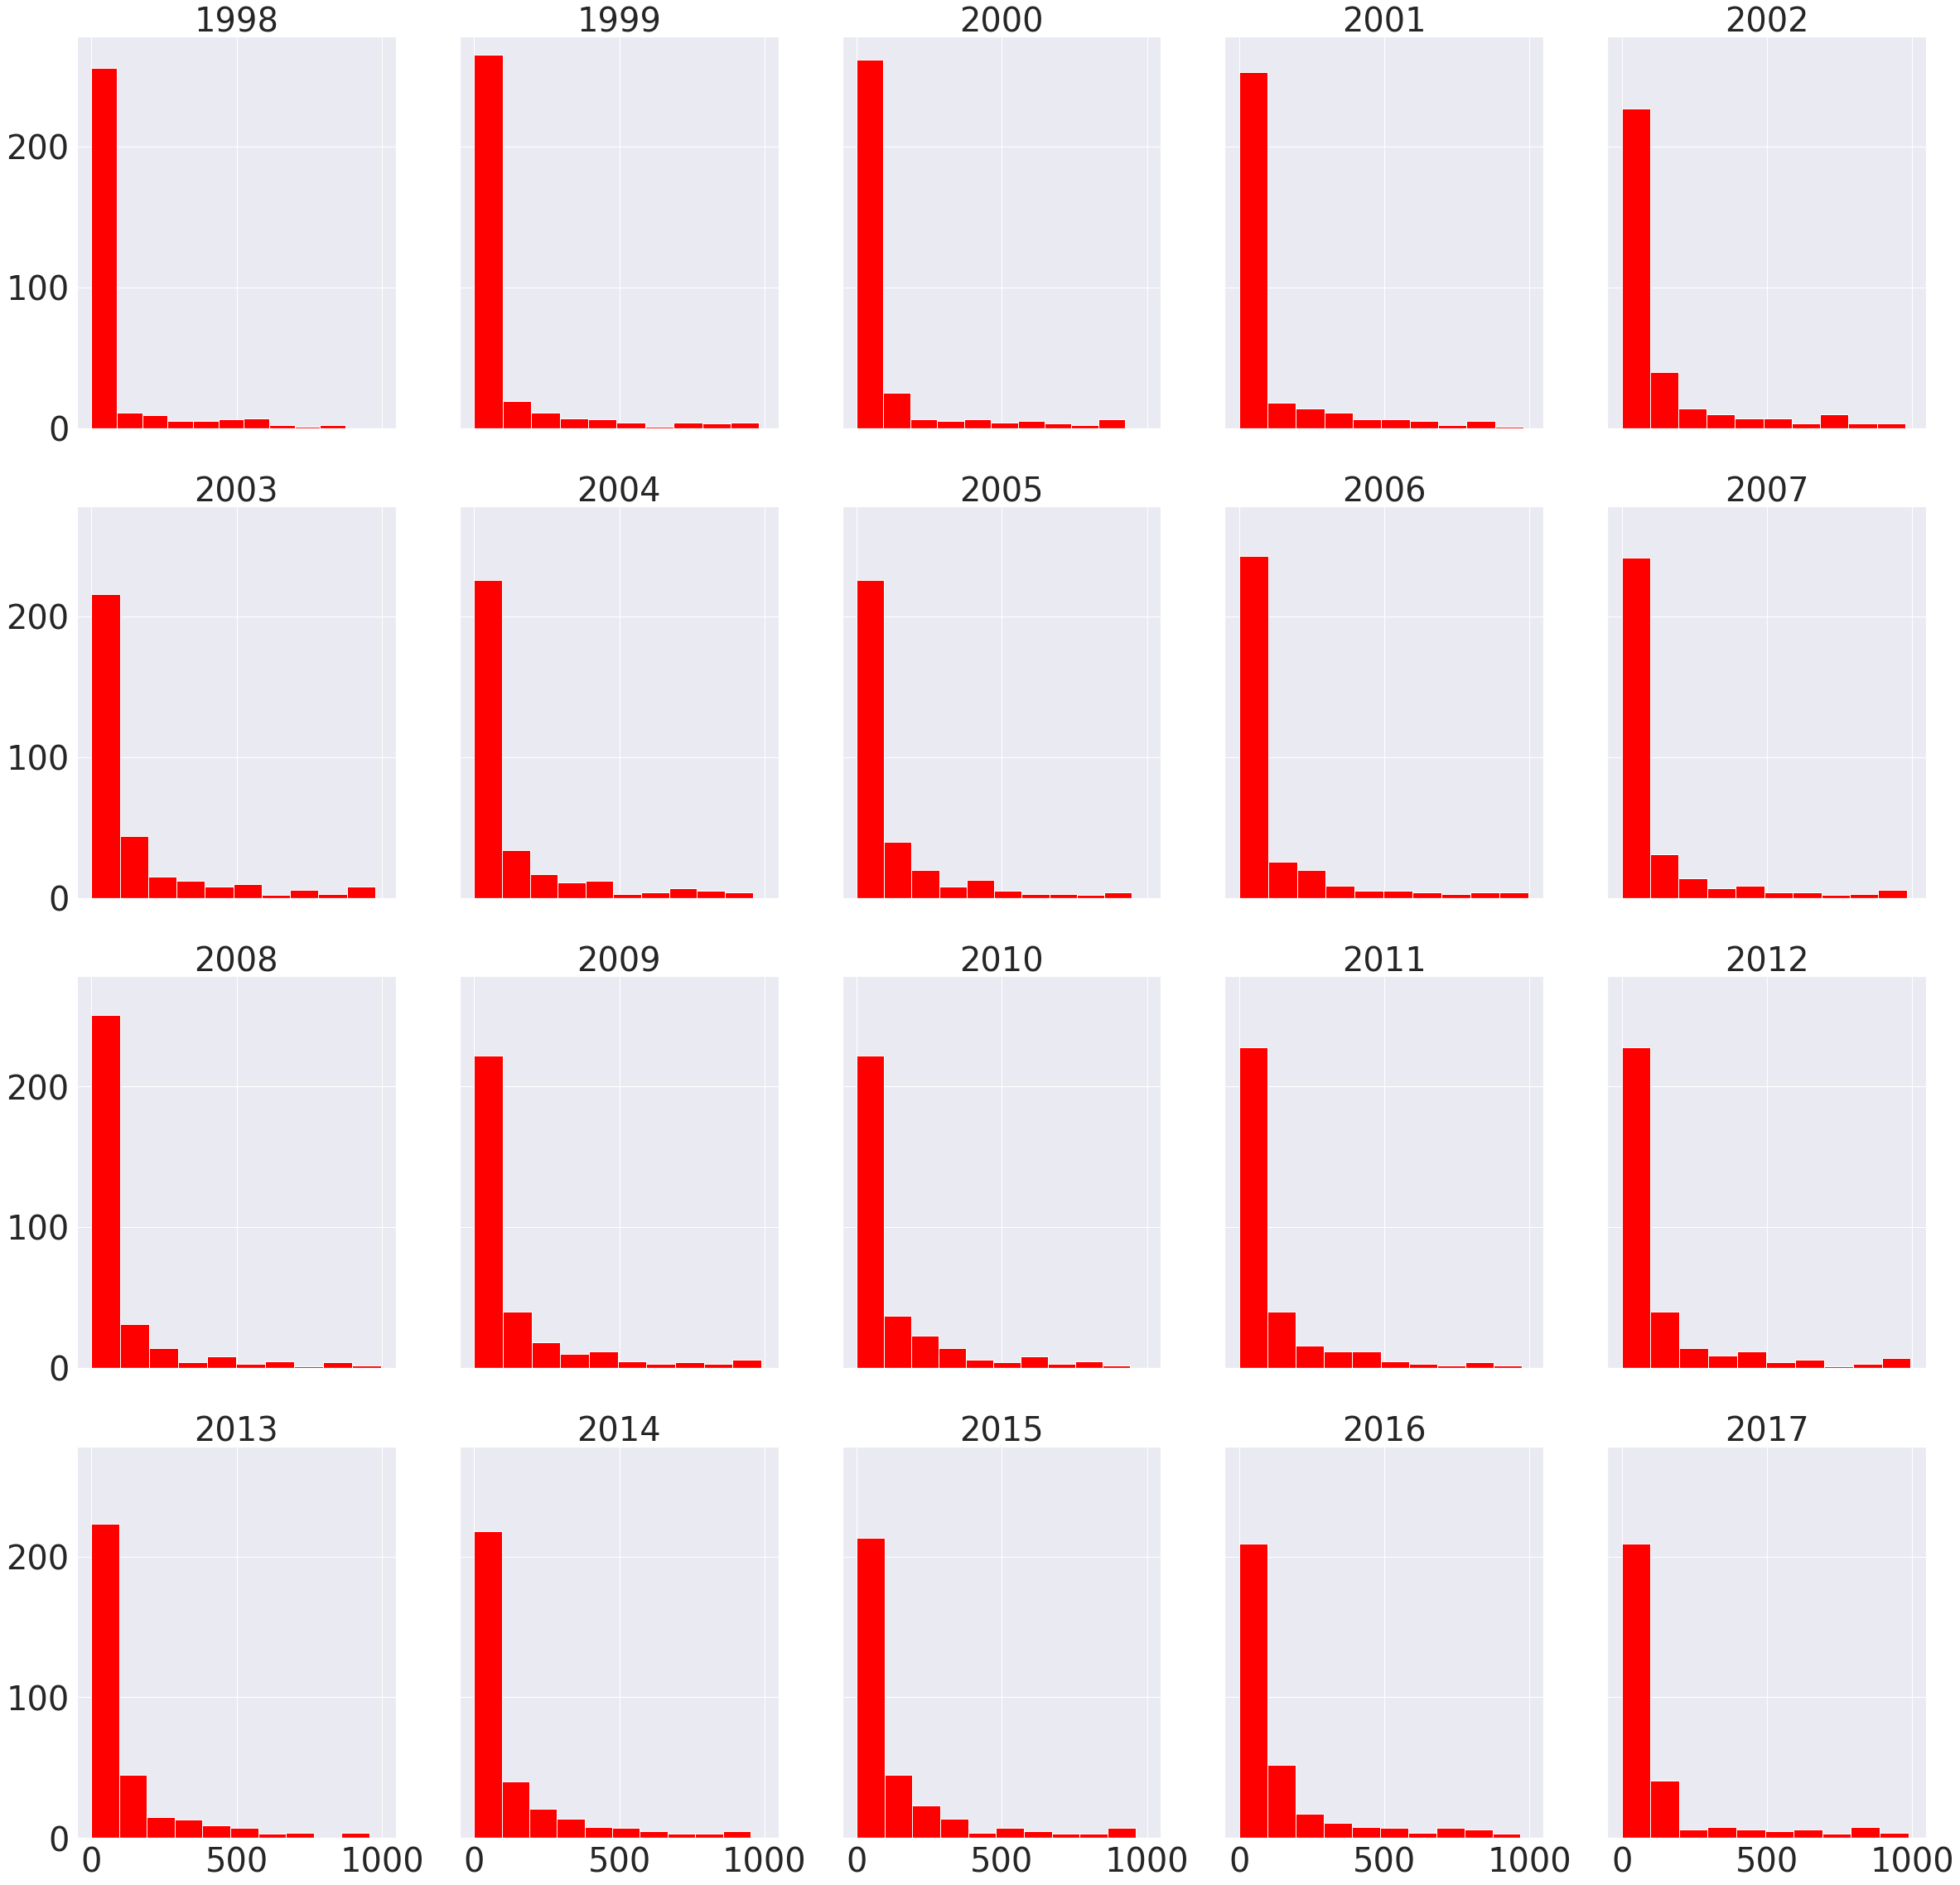

In [115]:
years = df_formated.year.unique()
total_burn_year = {}
fig, ((ax1, ax2, ax3, ax4, ax5), 
      (ax6, ax7, ax8, ax9, ax10), 
      (ax11, ax12, ax13, ax14, ax15), 
      (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(4, 5, sharex=True, sharey=True,figsize=(40,40))
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20]

for index, year in enumerate(years):
    total_by_year = df_formated.loc[df_formated.year == year].number.values
    axs[index].set_title(year, fontsize=40)
    axs[index].tick_params(axis="x", labelsize=40)
    axs[index].tick_params(axis="y", labelsize=40)
    axs[index].hist(total_by_year, bins=10, color='red')

plt.show()

## 9) Faça a distribuição da média de incêndios por mês e ilustre o resultado em um gráfico.

In [133]:
months = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

months_by_burns = df_formated.groupby(['month'])['number'].mean().round(2).reset_index()
months_by_burns['index_month'] = months_by_burns['month'].map(months)
bar_plot_df = months_by_burns.sort_values(by='index_month')

bar_plot_df.rename(columns={'month':'Month', 'number':'Reported_Fires'}, inplace=True)

bar_plot = px.bar(bar_plot_df, x='Month', y='Reported_Fires', color='Reported_Fires', labels={'Reported_Fires':'Count of reported fires ', 'Month':'Months'}, color_continuous_scale='Reds')

bar_plot.update_layout(xaxis_tickangle=-45, title_text='Average of reported fires between 1998-2017 by months')

bar_plot.show()

## 10) Identifique o ano com maior número de incêndios e o que possui menor registros de incêndios.

In [82]:
list_years_burn = df_formated.groupby(['year'])['number'].count().reset_index()

bigger_year = list_years_burn.max()
smaller_year = list_years_burn.min()

print(f'Maior Ano {bigger_year.year} foi {bigger_year.number} e o menor Ano {smaller_year.year} foi {smaller_year.number}')

Maior Ano 2017 foi 324 e o menor Ano 1998 foi 296


## 11)Realize agora a mesma distribuição mas por estado e identifique os estados que possuem um maior número de incêndios.

In [136]:
states_by_burns = df_formated.groupby(['state'])['number'].sum().round(2).reset_index()

bar_plot_state_df = states_by_burns.sort_values(by='number')

bar_plot_state_df.rename(columns={'state':'State', 'number':'Reported_Fires'}, inplace=True)

bar_plot_states = px.bar(bar_plot_state_df, x='State', y='Reported_Fires', color='Reported_Fires', labels={'Reported_Fires':'Count of reported fires ', 'Month':'Months'}, color_continuous_scale='Reds')

bar_plot_states.update_layout(xaxis_tickangle=-45, title_text='Total of reported fires between 1998-2017 by states')

bar_plot_states.show()

## 12) Para cada estado identifique quais são os meses que possuem um maior e menor número de incêndios, plote em um gráfico o resultado.

In [105]:


states_x_months_df = pd.DataFrame()

df_formated.groupby(['state','month'])['number'].count().reset_index()

# bar_plot_df = df_formated.groupby(['month'])['number'].count()

# bar_plot_df = bar_plot_df.reset_index()

# bar_plot_df.rename(columns={'month':'Month', 'number':'Reported_Fires'}, inplace=True)

# bar_plot=px.bar(bar_plot_df, x='Month', y='Reported_Fires', color='Reported_Fires',
#            labels={'Reported_Fires':'Count of reported fires ', 'Month':'Months'}, color_continuous_scale='Reds')

# bar_plot

,state,month,number
0,Acre,Abril,20
1,Acre,Agosto,20
2,Acre,Dezembro,19
3,Acre,Fevereiro,20
4,Acre,Janeiro,20
...,...,...,...
271,Tocantins,Maio,20
272,Tocantins,Março,20
273,Tocantins,Novembro,20
274,Tocantins,Outubro,20


## 13)Crie um gráfico com a distribuição dos incidentes de incêndio por estado no decorrer dos anos.

In [ ]:
x = df_formated.groupby(['year', 'state'])['number'].mean().reset_index()
plt.hist(x.number)